<a href="https://colab.research.google.com/github/faizijr12github/Titanic-EDA/blob/main/Titanic_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install kaggle

In [2]:
# configuring the path of Kaggle.json file
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [3]:
!kaggle competitions download -c titanic

In [4]:
# extracting the compessed Dataset
from zipfile import ZipFile
dataset = '/content/titanic.zip'

with ZipFile(dataset,'r') as zip:
  zip.extractall()
  print('The dataset is extracted')

The dataset is extracted


In [5]:
import pandas as pd
df = pd.read_csv('/content/train.csv')
df.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
154,155,0,3,"Olsen, Mr. Ole Martin",male,NaN,0,0,Fa 265302,7.3125,NaN,S
720,721,1,2,"Harper, Miss. Annie Jessie ""Nina""",female,6.0,0,1,248727,33.0000,NaN,S
280,281,0,3,"Duane, Mr. Frank",male,65.0,0,0,336439,7.7500,NaN,Q
252,253,0,1,"Stead, Mr. William Thomas",male,62.0,0,0,113514,26.5500,C87,S
128,129,1,3,"Peter, Miss. Anna",female,NaN,1,1,2668,22.3583,F E69,C


**How Big is our data**

In [6]:
df.shape

(891, 12)

**What are the data types of our columns**

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


**How does data look mathematically**

In [8]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


**Are there any missing values?**

In [9]:
df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


**Are there any duplicated values**

In [10]:
df.duplicated().sum()

np.int64(0)

**Correlation**

# Univariate EDA - Categorical Data

In [11]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

**Categorical Data** =>
In our dataset we have categorical columns : Survived, Pclass, Sex, Embarked

**🎯 Survival Distribution**

In [12]:
df['Survived'].value_counts()

,count
Survived,
0,549
1,342


<Axes: xlabel='Survived', ylabel='count'>

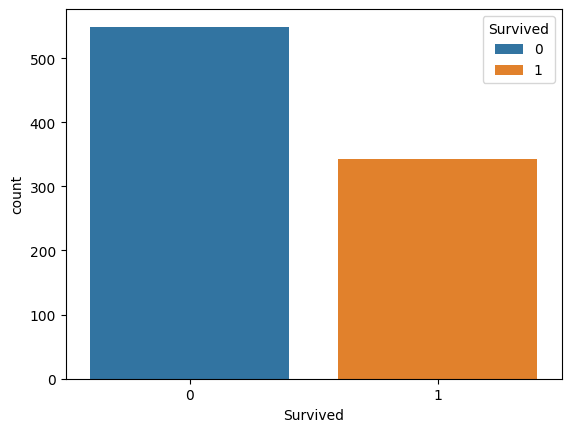

In [111]:
import seaborn as sns
sns.countplot(x='Survived', data=df, hue='Survived')

**Pie Chart**

<Axes: ylabel='count'>

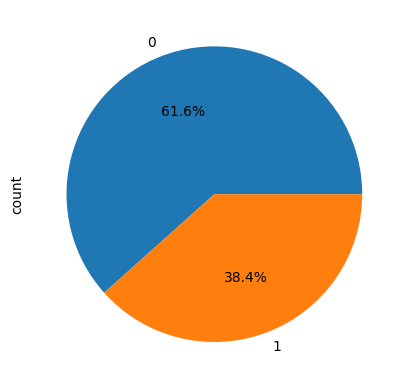

In [112]:
df['Survived'].value_counts().plot.pie(autopct="%1.1f%%")

In [113]:
df['Survived'].unique()

array([0, 1])

In [16]:
df['Survived'].isnull().sum()

np.int64(0)

In [17]:
df['Pclass'].value_counts()

,count
Pclass,
3,491
1,216
2,184


<Axes: xlabel='Pclass', ylabel='count'>

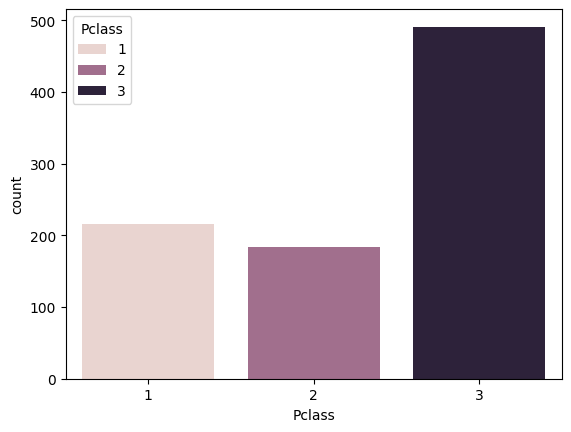

In [114]:
sns.countplot(x='Pclass',data=df, hue='Pclass')

<Axes: ylabel='count'>

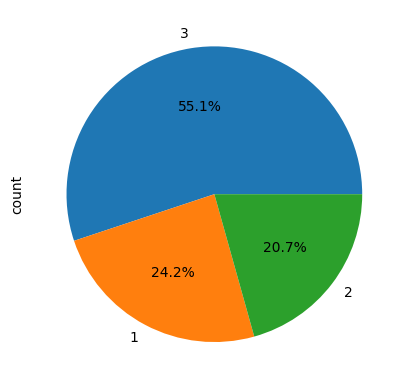

In [19]:
# pie chart of column Pclass
df['Pclass'].value_counts().plot.pie(autopct="%1.1f%%")

In [20]:
df['Pclass'].unique()

array([3, 1, 2])

In [21]:
df['Pclass'].isnull().sum()

np.int64(0)

In [22]:
df['Sex'].value_counts()

,count
Sex,
male,577
female,314


<Axes: xlabel='Sex', ylabel='count'>

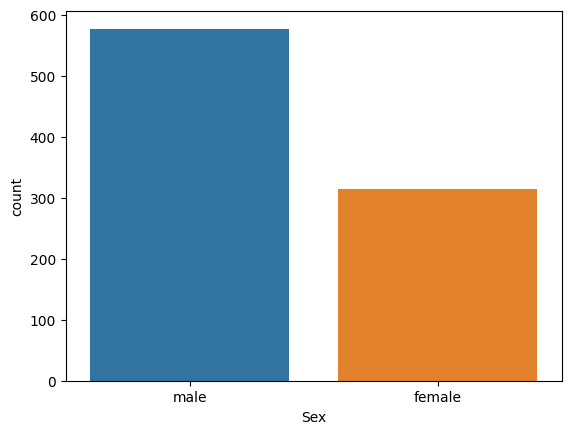

In [115]:
sns.countplot(x='Sex',data=df,hue='Sex')

<Axes: ylabel='count'>

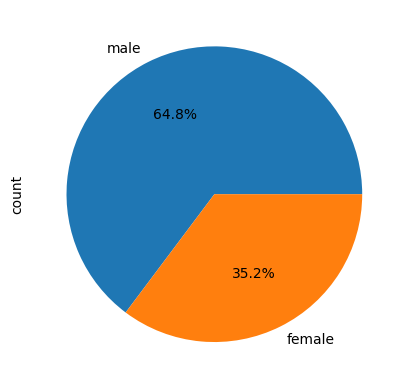

In [24]:
df['Sex'].value_counts().plot.pie(autopct="%1.1f%%")

In [25]:
df['Sex'].isnull().sum()

np.int64(0)

In [26]:
df['Embarked'].value_counts()

,count
Embarked,
S,644
C,168
Q,77


<Axes: xlabel='Embarked', ylabel='count'>

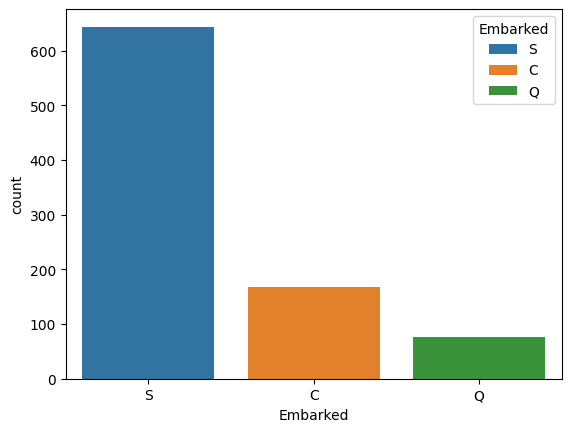

In [116]:
sns.countplot(x='Embarked',data=df,hue='Embarked')

<Axes: ylabel='count'>

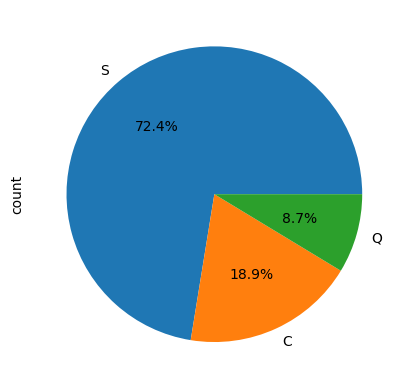

In [28]:
df['Embarked'].value_counts().plot.pie(autopct="%1.1f%%")

In [29]:
df['Embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [30]:
df['Embarked'].isnull().sum()

np.int64(2)

# Univariate EDA - Numerical Data

📍 Common Numerical Columns in Titanic:
Age, Fare, SibSp, Parch

🔢 Summary Statistics
Get basic numbers like mean, median, min, max, std (spread).

In [31]:
df['Age'].describe()

,Age
count,714.000000
mean,29.699118
std,14.526497
min,0.420000
25%,20.125000
50%,28.000000
75%,38.000000
max,80.000000


📊 Histogram
Shows the distribution (how values are spread).

Helps see if the data is normal, skewed, or has outliers.

<Axes: xlabel='Age', ylabel='Count'>

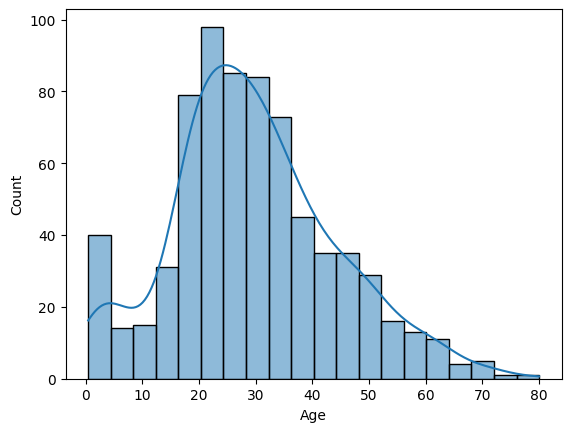

In [32]:
sns.histplot(df['Age'],kde=True)

📈 Box Plot
Shows the median, quartiles, and outliers.

<Axes: xlabel='Age'>

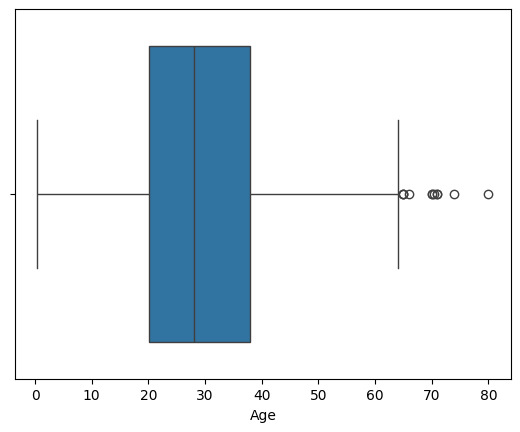

In [33]:
sns.boxplot(x=df['Age'])

🧮 Check Skewness

In [34]:
df['Age'].skew()

np.float64(0.38910778230082704)

🕳️ Find Missing Values
Check if the column has any NaN (empty) values.

In [35]:
df['Age'].isnull().sum()

np.int64(177)

In [36]:
df['Fare'].describe()

,Fare
count,891.000000
mean,32.204208
std,49.693429
min,0.000000
25%,7.910400
50%,14.454200
75%,31.000000
max,512.329200


<Axes: xlabel='Fare', ylabel='Count'>

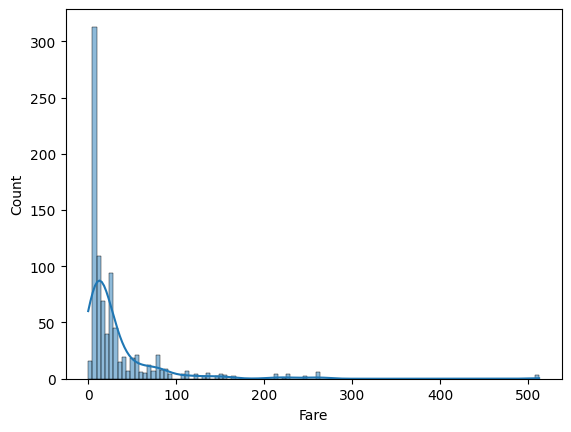

In [37]:
sns.histplot(df['Fare'],kde=True)

**Observation** : In summary, the distribution of 'Fare' is heavily concentrated at lower values, with a few observations having much higher fare values, pulling the mean to the right of the median and the mode.

<Axes: xlabel='Fare'>

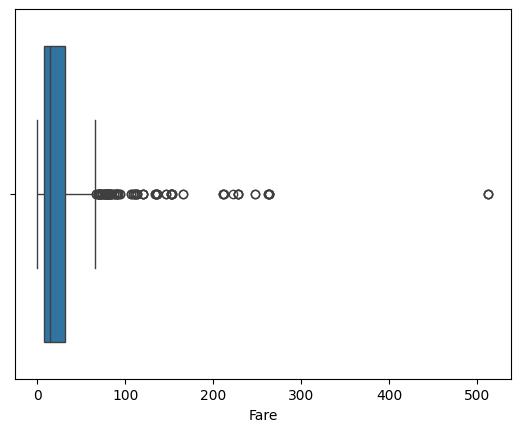

In [38]:
sns.boxplot(x=df['Fare'])

In [39]:
df['Fare'].skew()

np.float64(4.787316519674893)

In [40]:
df['Fare'].isnull().sum()

np.int64(0)

In [41]:
df['SibSp'].describe()

,SibSp
count,891.000000
mean,0.523008
std,1.102743
min,0.000000
25%,0.000000
50%,0.000000
75%,1.000000
max,8.000000


<Axes: xlabel='SibSp', ylabel='Count'>

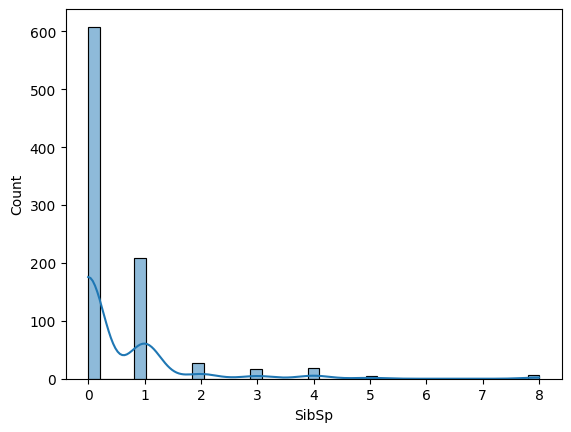

In [42]:
sns.histplot(df['SibSp'],kde=True)

**Observations** : the distribution of 'SibSp' is heavily concentrated at 0, with a smaller number at 1, and very few observations at higher values. This makes it a strongly positively skewed and discrete distribution, far from a normal distribution.

<Axes: xlabel='SibSp'>

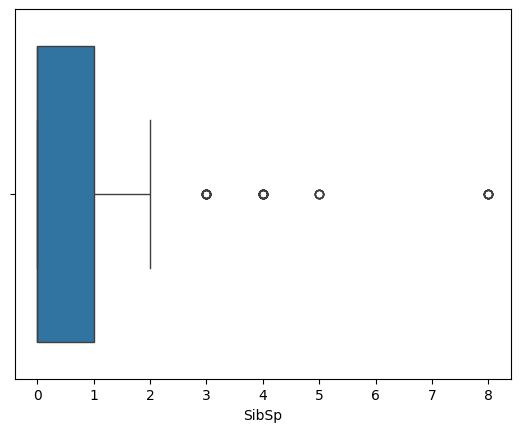

In [43]:
sns.boxplot(x=df['SibSp'])

In [44]:
df['SibSp'].isnull().sum()

np.int64(0)

In [45]:
df['Parch'].describe()

,Parch
count,891.000000
mean,0.381594
std,0.806057
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,6.000000


<Axes: xlabel='Parch', ylabel='Count'>

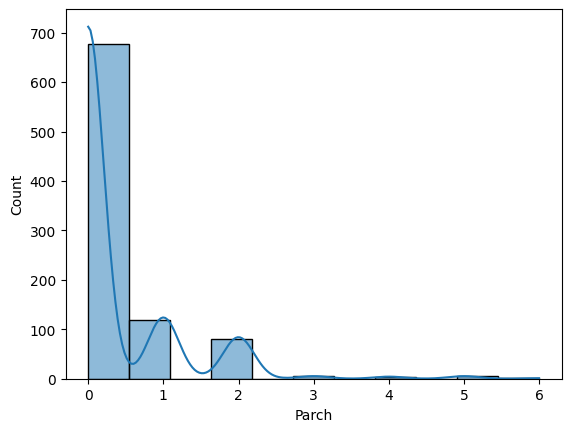

In [46]:
sns.histplot(df['Parch'],kde=True)

<Axes: xlabel='Parch'>

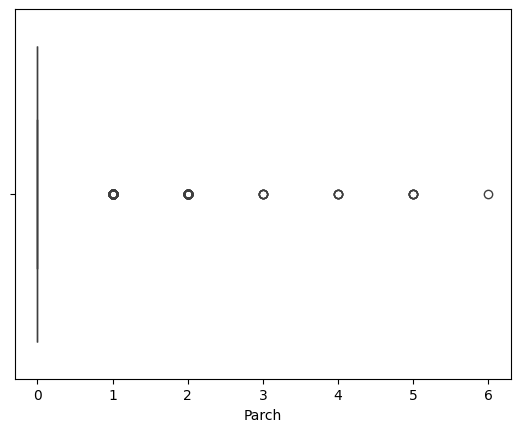

In [47]:
sns.boxplot(x=df['Parch'])

In [48]:
df['Parch'].skew()

np.float64(2.7491170471010933)

In [49]:
df['Parch'].isnull().sum()

np.int64(0)

# 🧪 Bivariate EDA
It means studying the relationship between two columns in your data.

**1️⃣ Numerical - Numerical (Both columns have numbers)**

☘️ Scatterplot
Dots on a graph.

Shows if two number columns go up or down together.

☘️ Pair plot
Many scatterplots in one picture.

Helps to see all number columns together.

☘️ Line plot
A line that joins dots.

Good for seeing how numbers change over time.

<Axes: xlabel='Age', ylabel='Fare'>

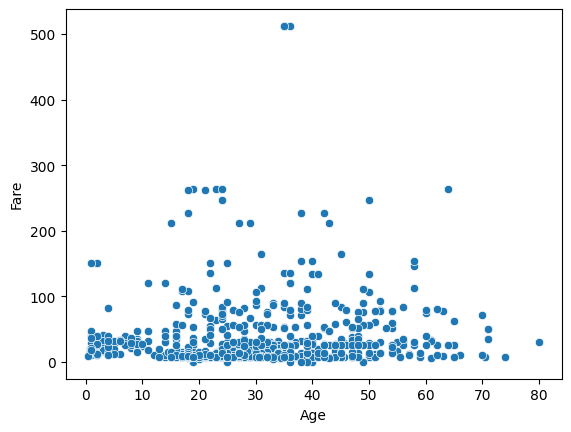

In [50]:
sns.scatterplot(x='Age',y='Fare',data=df)

<Axes: xlabel='Age', ylabel='Fare'>

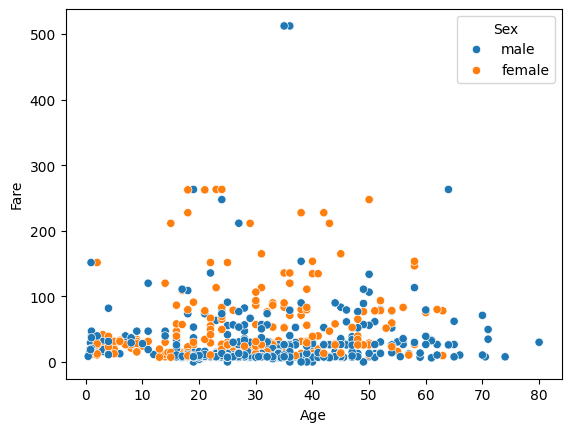

In [51]:
sns.scatterplot(x='Age',y='Fare',data=df,hue=df['Sex'])

<Axes: xlabel='Age', ylabel='Fare'>

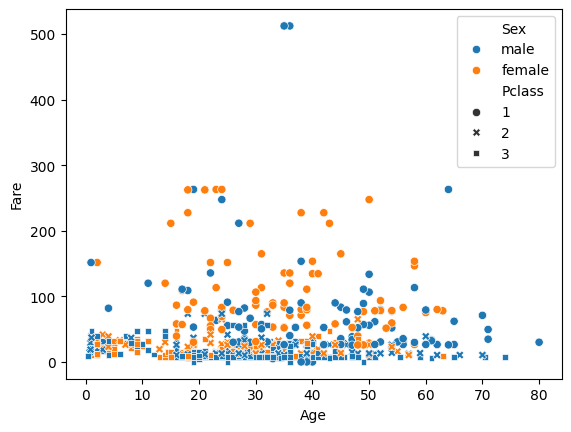

In [52]:
sns.scatterplot(x='Age',y='Fare',data=df,hue=df['Sex'],style=df['Pclass'])

<Axes: xlabel='Age', ylabel='Fare'>

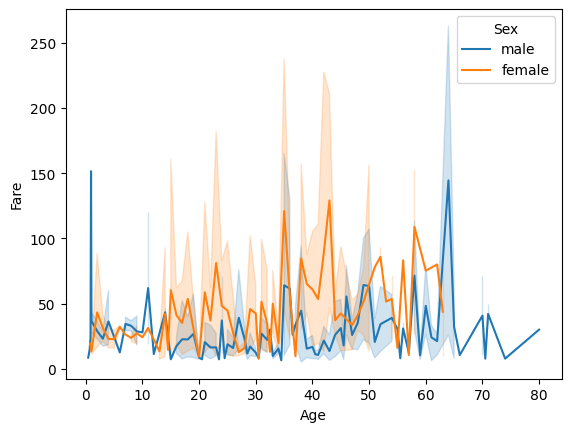

In [54]:
sns.lineplot(x='Age',y='Fare',data=df,hue=df['Sex'])

**2️⃣ Numerical - Categorical (One column is number, one is name/type)**

☘️ Boxplot
Shows high, low, and middle of numbers for each group.

Looks like a box with lines.

☘️ Barplot
Bars that show the average or total of numbers for each group.

☘️ Distplot
Shows how numbers are spread in each group.

Like a smooth mountain shape.



<Axes: xlabel='Pclass', ylabel='Age'>

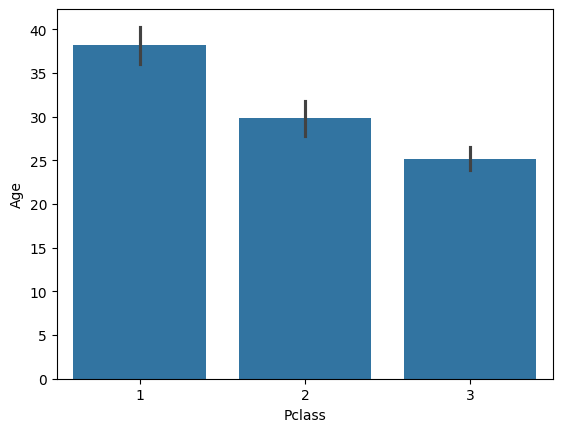

In [99]:
# checking the ages of people in each pclass
sns.barplot(data=df, x='Pclass',y='Age')

<Axes: xlabel='Pclass', ylabel='Age'>

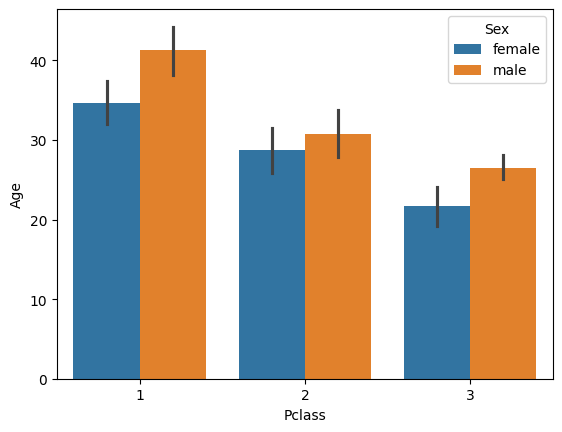

In [60]:
sns.barplot(data=df, x='Pclass',y='Age',hue='Sex')

<Axes: xlabel='Pclass', ylabel='Age'>

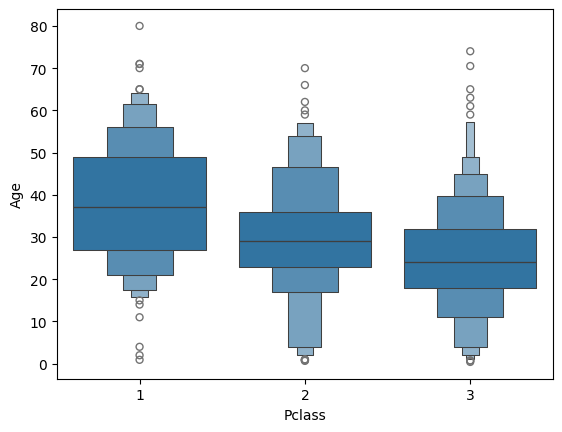

In [63]:
sns.boxenplot(data=df, x='Pclass',y='Age')

<Axes: xlabel='Pclass', ylabel='Fare'>

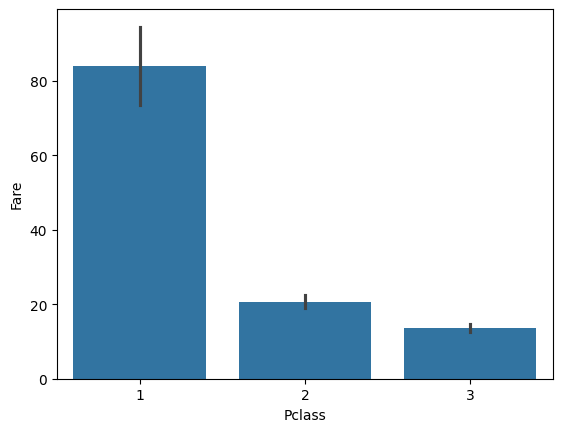

In [68]:
sns.barplot(data=df, x='Pclass',y='Fare')

<Axes: xlabel='Pclass', ylabel='Fare'>

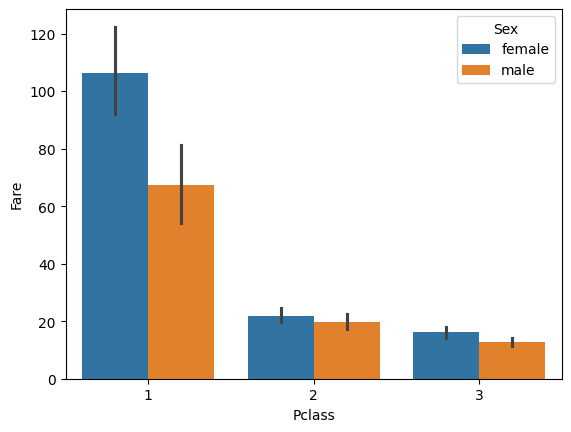

In [69]:
sns.barplot(data=df, x='Pclass',y='Fare',hue='Sex')

<Axes: xlabel='Pclass', ylabel='Fare'>

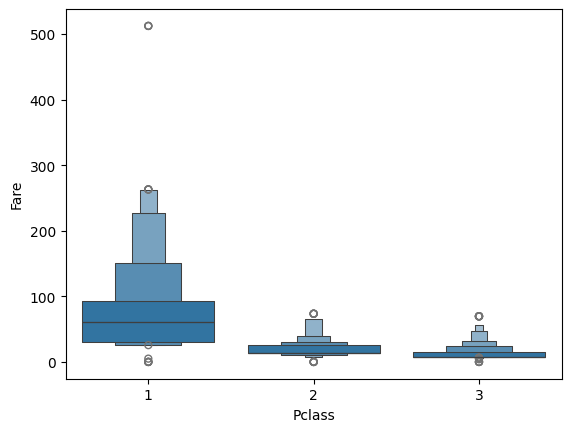

In [70]:
sns.boxenplot(data=df, x='Pclass',y='Fare')

<Axes: xlabel='Sex', ylabel='Age'>

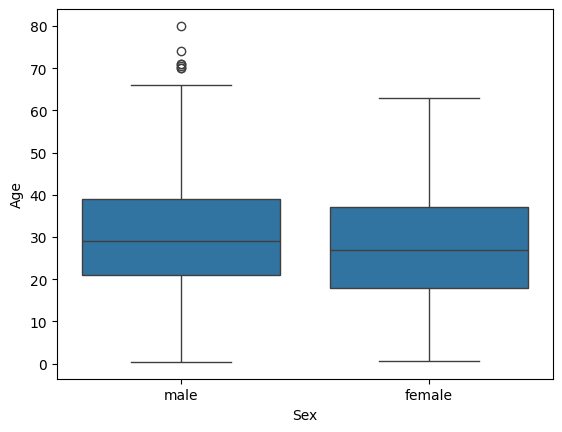

In [72]:
sns.boxplot(data=df,x='Sex',y='Age')

<ipython-input-77-b973861d854e>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[df['Survived']==0]['Age'],hist=False) # blue for age graph who died
<ipython-input-77-b973861d854e>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[df['Survived']==1]['Age'],hist=False) # bl

<Axes: xlabel='Age', ylabel='Density'>

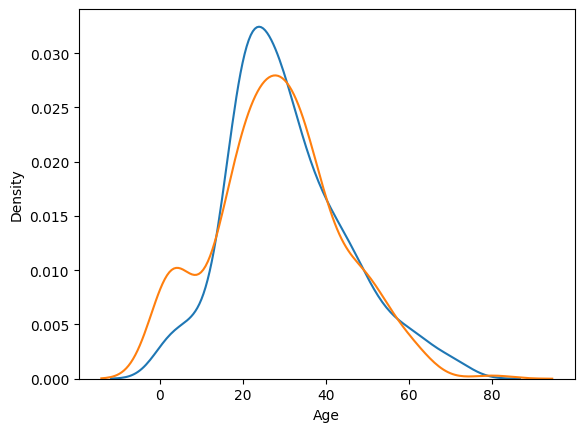

In [77]:
sns.distplot(df[df['Survived']==0]['Age'],hist=False) # blue for age graph who died
sns.distplot(df[df['Survived']==1]['Age'],hist=False) # blue for age graph who died

**3️⃣ Categorical - Categorical (Both columns are names/types)**

☘️ Heatplot
A box chart with colors.

Darker color means higher value.

☘️ Clustermap
Like a heatplot but smarter.

It groups similar rows and columns together.

**📘 What is crosstab?**

pandas.crosstab() is a function in Python that compares two columns and shows how many times each value combination appears — like a table or matrix.

In [80]:
# I want to check how many people survived and died in each pclass
pd.crosstab(df['Survived'],df['Pclass'])

Pclass,1,2,3
Survived,,,
0,80,97,372
1,136,87,119


<Axes: xlabel='Pclass', ylabel='Survived'>

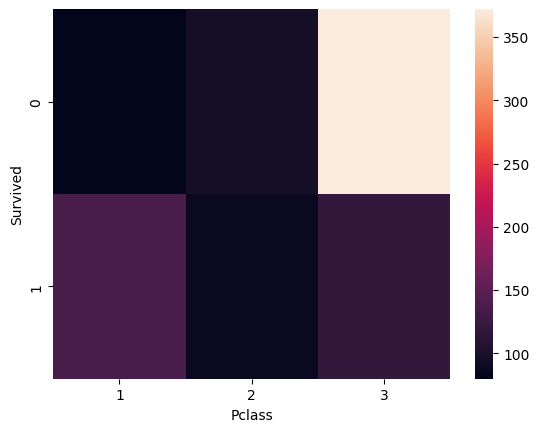

In [81]:
sns.heatmap(pd.crosstab(df['Survived'],df['Pclass']))

In [83]:
df['Pclass'].value_counts()

,count
Pclass,
3,491
1,216
2,184


In [92]:
df.groupby('Pclass')['Survived'].mean()*100

,Survived
Pclass,
1,62.962963
2,47.282609
3,24.236253


In [93]:
df.groupby('Embarked')['Survived'].mean()*100

,Survived
Embarked,
C,55.357143
Q,38.961039
S,33.695652


In [96]:
pd.crosstab(df['Embarked'], df['Pclass'])

Pclass,1,2,3
Embarked,,,
C,85,17,66
Q,2,3,72
S,127,164,353


<Axes: xlabel='Survived', ylabel='count'>

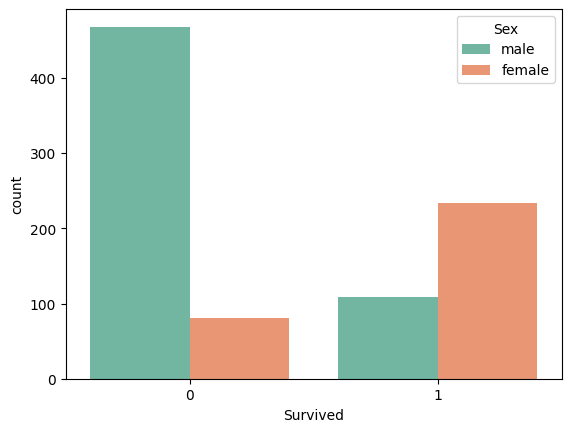

In [104]:
sns.countplot(x='Survived', hue='Sex', data=df, palette='Set2')

<Axes: xlabel='Survived', ylabel='count'>

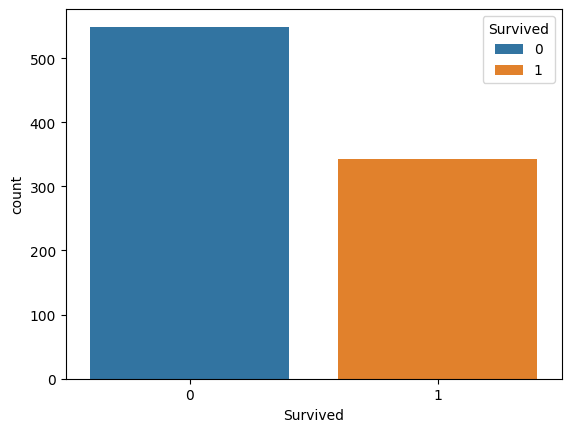

In [107]:
sns.countplot(x='Survived', hue='Survived', data=df)

<Axes: >

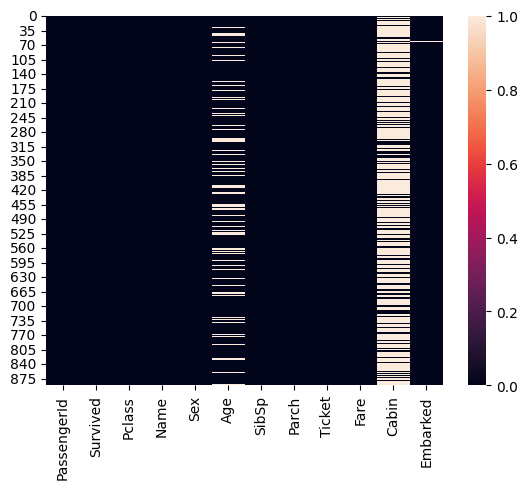

In [109]:
sns.heatmap(df.isnull())

**👤 Survival by Gender and Passenger Class**

<Axes: xlabel='Survived', ylabel='count'>

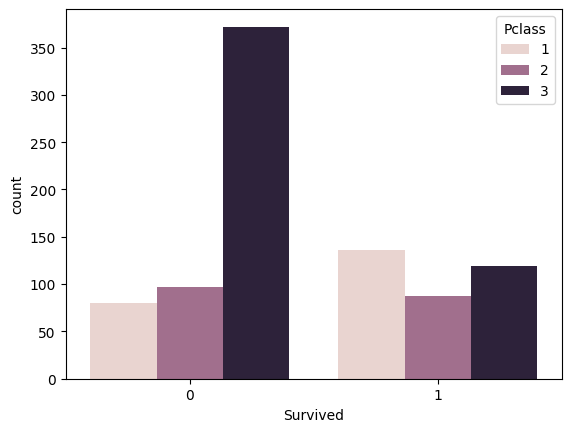

In [110]:
sns.countplot(x='Survived', hue='Pclass', data=df)

In [118]:
pd.crosstab(df['Pclass'], df['Sex'])

Sex,female,male
Pclass,,
1,94,122
2,76,108
3,144,347


In [122]:
pd.crosstab([df['Sex'], df['Pclass']], df['Survived'])

Survived         0   1
Sex    Pclass         
female 1         3  91
       2         6  70
       3        72  72
male   1        77  45
       2        91  17
       3       300  47

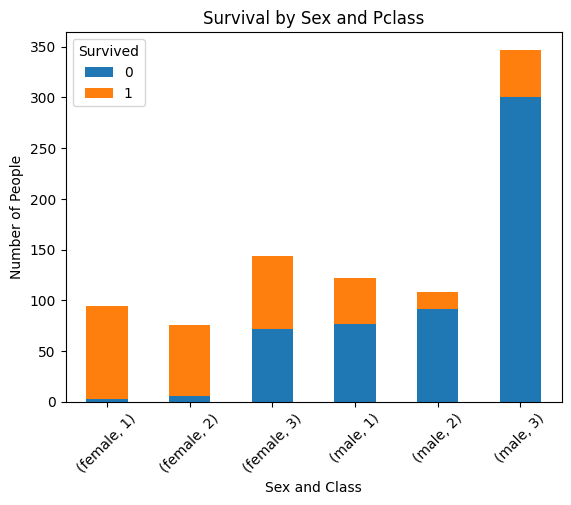

In [125]:
import matplotlib.pyplot as plt

pd.crosstab([df['Sex'], df['Pclass']], df['Survived']).plot(kind='bar', stacked=True)
plt.title("Survival by Sex and Pclass")
plt.xlabel("Sex and Class")
plt.ylabel("Number of People")
plt.xticks(rotation=45)
plt.show()

<Axes: xlabel='Age', ylabel='Density'>

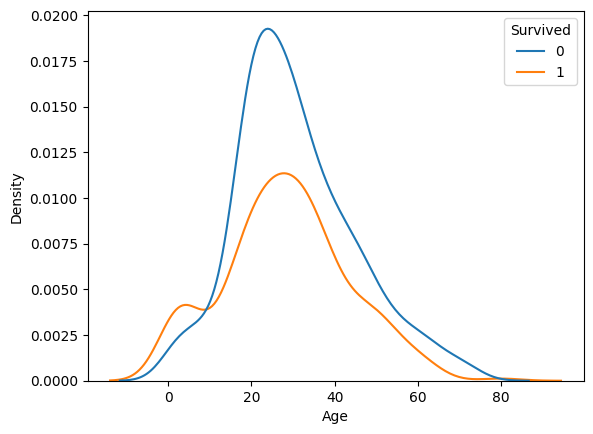

In [135]:
sns.kdeplot(data=df, x="Age", hue="Survived", fill=False)

A higher proportion of very young children survived.
Young adults had a relatively lower survival rate.

<Axes: xlabel='Fare', ylabel='Density'>

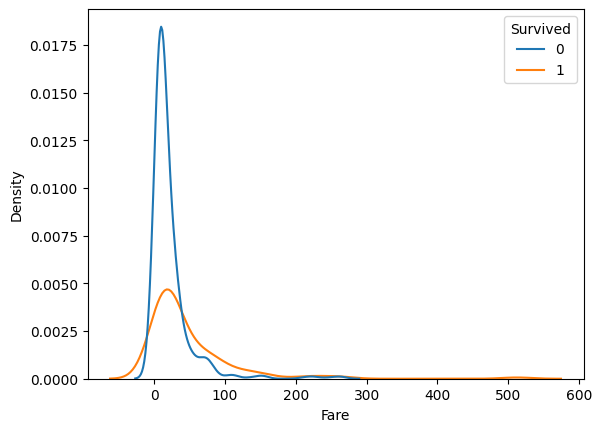

In [136]:
sns.kdeplot(data=df, x="Fare", hue="Survived", fill=False)

Most non-survivors paid low fares.
Survivors paid a wider range of fares.
A larger proportion of high-fare passengers survived.
Paying more for a ticket seems linked to a higher chance of survival.

In [143]:
df.groupby("Pclass")["Fare"].mean()

,Fare
Pclass,
1,84.154687
2,20.662183
3,13.675550


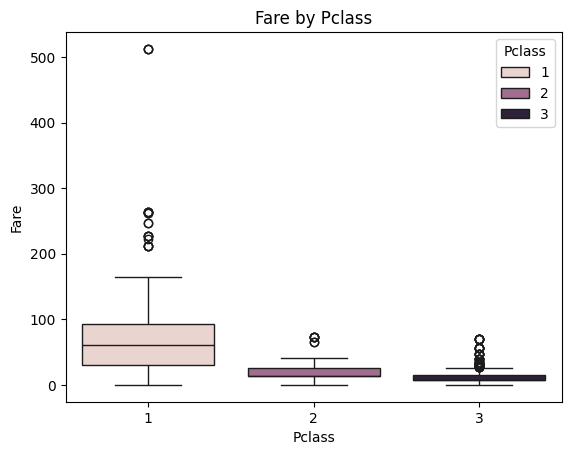

In [151]:
sns.boxplot(x="Pclass", y="Fare", data=df,hue='Pclass')
plt.title("Fare by Pclass")
plt.xlabel("Pclass")
plt.ylabel("Fare")
plt.show()

<Axes: xlabel='Pclass', ylabel='Fare'>

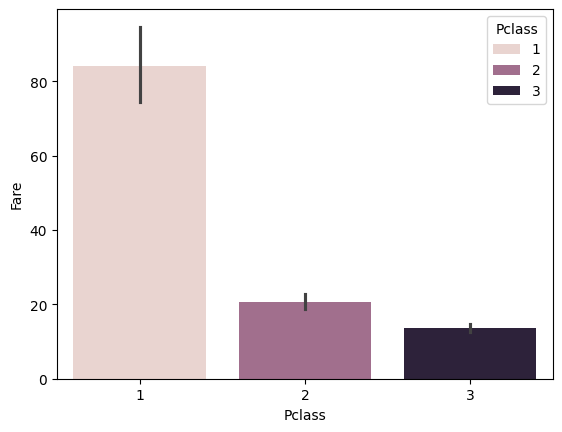

In [150]:
sns.barplot(data=df, x='Pclass',y='Fare',hue='Pclass')

🛳️ Survival by Port of Embarkation

<Axes: xlabel='Embarked', ylabel='count'>

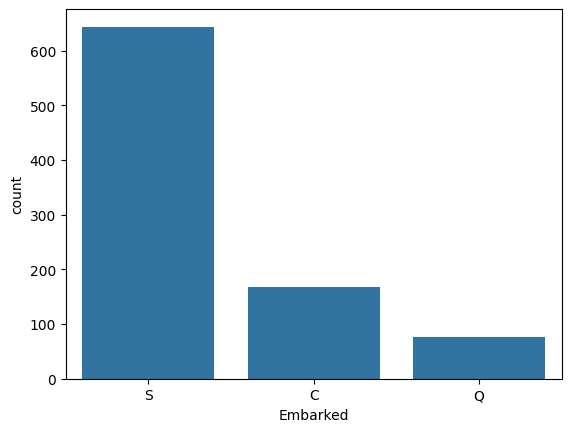

In [155]:
sns.countplot(x='Embarked',data=df)

<Axes: xlabel='Embarked', ylabel='count'>

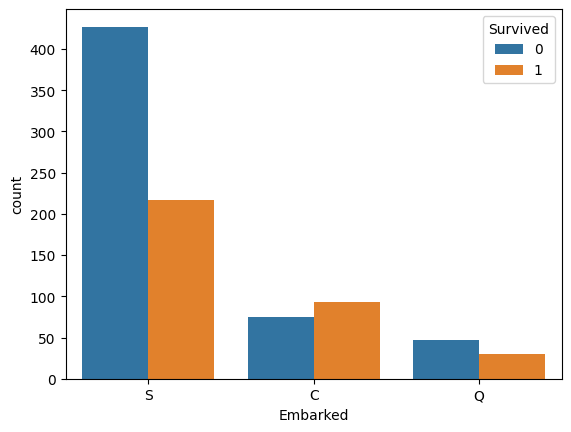

In [153]:
sns.countplot(x='Embarked', hue='Survived', data=df)

🛳️ Survival by Port of SibSp

<Axes: xlabel='SibSp', ylabel='count'>

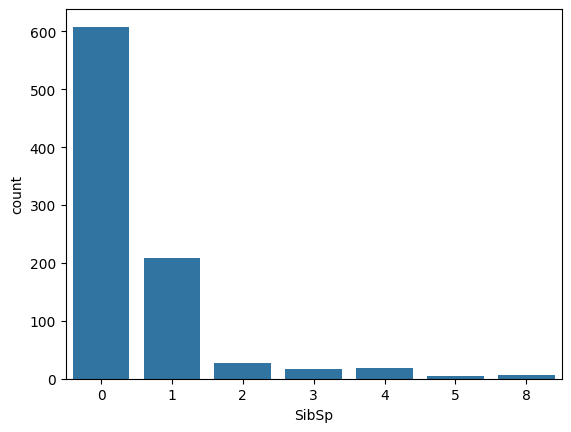

In [157]:
sns.countplot(x='SibSp',data=df)

<Axes: xlabel='SibSp', ylabel='count'>

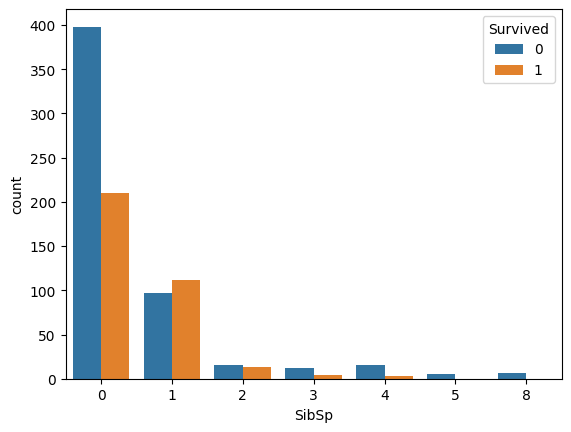

In [158]:
sns.countplot(x='SibSp',data=df,hue='Survived')

<Axes: xlabel='Parch', ylabel='count'>

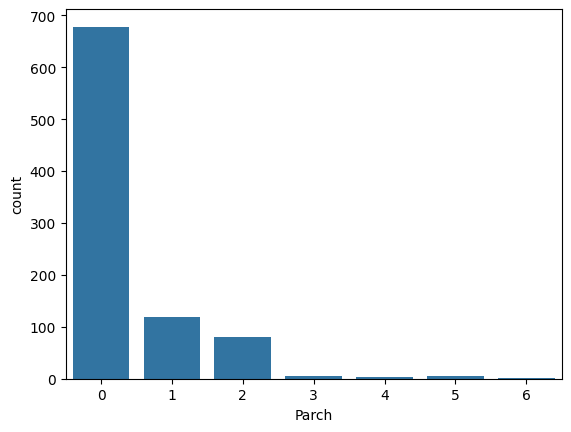

In [159]:
sns.countplot(x='Parch',data=df)

<Axes: xlabel='Parch', ylabel='count'>

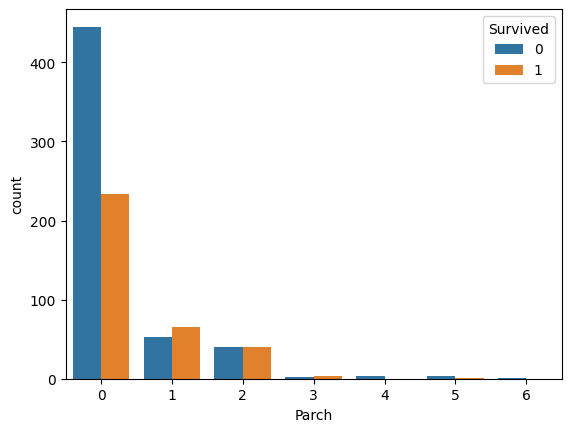

In [160]:
sns.countplot(x='Parch',data=df,hue='Survived')